<a href="https://colab.research.google.com/github/minhazuddin/cnn/blob/main/CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

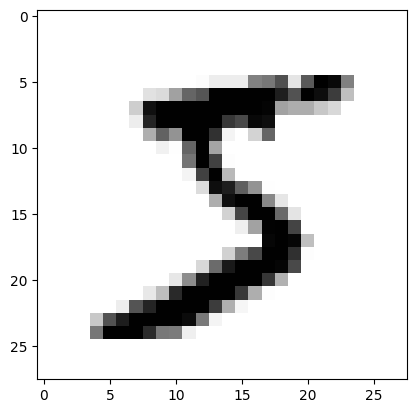

In [7]:
plt.imshow(X_train[0], cmap='binary')

In [8]:
X_train[0].max()

255

In [9]:
X_train[0].min()

0

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train.max()

1.0

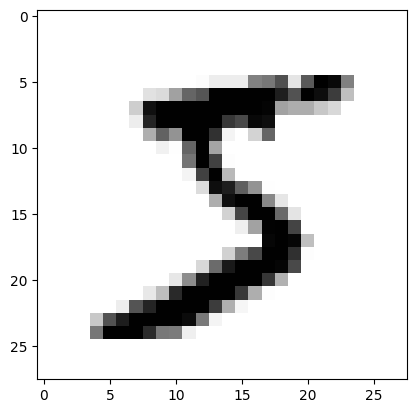

In [17]:
plt.imshow(X_train[0], cmap='binary')

In [26]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [30]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [33]:
X_train.shape

(60000, 28, 28, 1)

In [35]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), input_shape = (28,28,1), activation='relu'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10, activation='softmax')
                            ])



In [47]:
model.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [49]:
model.fit(X_train, y_cat_train, epochs=10, validation_data = (X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1449 - accuracy: 0.9572 - val_loss: 0.0738 - val_accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0495 - accuracy: 0.9843 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0422 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0373 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0489 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0516 - val_accuracy: 0.9855


In [50]:
losses = pd.DataFrame(model.history.history)

In [52]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.144897,0.957183,0.073805,0.9771
1,0.049528,0.984267,0.039786,0.9868
2,0.030730,0.989983,0.042192,0.9853
3,0.021347,0.993250,0.037260,0.9880
4,0.014123,0.995217,0.048874,0.9858
5,0.010877,0.996650,0.051554,0.9855


In [53]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0516 - accuracy: 0.9855


[0.051553502678871155, 0.9854999780654907]

In [56]:
model.metrics_names

['loss', 'accuracy']

In [63]:
model_prediction = model.predict(X_test)
model_prediction = np.argmax(model_prediction, axis=1)

313/313 [==============================] - 1s 4ms/step


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(classification_report(y_test, model_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

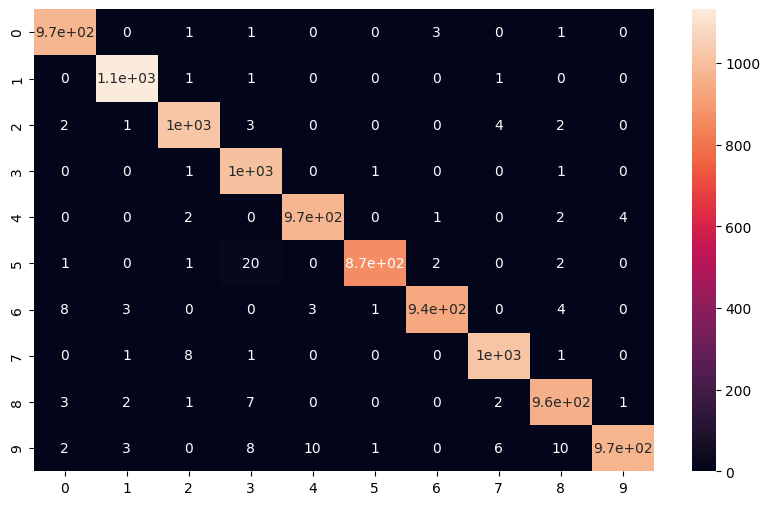

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, model_prediction), annot=True)

In [72]:
new_number = X_test[0]

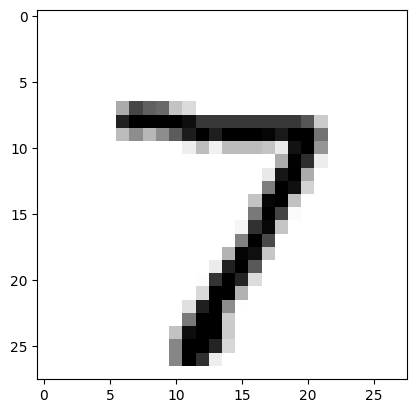

In [73]:
plt.imshow(new_number, cmap='binary')

In [75]:
new_number.shape

(28, 28, 1)

In [78]:
model.predict(new_number.reshape(-1, 28, 28, 1), verbose=0).argmax()

7